In [1]:
import numpy as np
import scipy as ci 
import pandas as pd 
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from scipy.optimize import curve_fit
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.gridspec as gridspec
from IPython.display import display, HTML

import seaborn as sns 
import random
import tables 
import pickle
import warnings
warnings.filterwarnings('once')

%matplotlib inline 
%config InlineBackend.figure_format = 'retina'

In [2]:
plt.figure()
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams.update({'font.size': 12})
plt.rc('axes', axisbelow=True)

<Figure size 432x288 with 0 Axes>

In [3]:
lifetime = 86400*365 # 1 year! 
fig_dir = '/Users/yang/Desktop/IceCube/Codes/my_proj/analysis_1_downgoing_neutrino/1_distribution_plots/plots/ana-sys-2-2-'
data_dir = '/Users/yang/Desktop/IceCube/Codes/my_proj/analysis_1_downgoing_neutrino/data/systematics/nugen_h5/'
plt.rcParams.update({'font.size': 14})
plt.rc('axes', axisbelow=True)

# read MC

In [44]:
E_reco_cut = 0.3

In [41]:
with tables.open_file(data_dir+'nugen_21217.h5','r') as f:
    n_file = 21632
    
    CUT_dedx = f.root.Collection.cols.len_dEdxVector[:] >= 6
    CUT_cascllh = f.root.CascadeLlhVertexFitParams.cols.rlogL[:] < 18
    CUT_d_IC = f.root.Dist_to_IC_center.cols.value[:] < 450
    CUT_LdirC = f.root.SplineMPEDirectHitsC.cols.dir_track_length[:] > 600
    CUT_balloon = f.root.Balloon.cols.InIceBalloonParameter[:] < 0.22
    CUT_multiplicity = f.root.TologicalCounterSplitCount.cols.value[:] == 1
    CUT_coincident = f.root.MCPrimary_coincident.cols.value[:] == 0 # buggy weight distribution for coincidents!! 
#     CUT_reco_quality = np.abs((np.log10(f.root.SplineMPETruncatedEnergy_SPICEMie_BINS_Muon.cols.energy[:]) - np.log10(f.root.MCPrimary_new.cols.energy[:]))/np.log10(f.root.MCPrimary_new.cols.energy[:])) < E_reco_cut   
#     CUT = CUT_dedx & CUT_cascllh & CUT_d_IC & CUT_LdirC & CUT_balloon & CUT_multiplicity & CUT_coincident & CUT_reco_quality
    
    reco_quality = np.abs((np.log10(f.root.SplineMPETruncatedEnergy_SPICEMie_BINS_Muon.cols.energy[:]) - np.log10(f.root.MCPrimary_new.cols.energy[:]))/np.log10(f.root.MCPrimary_new.cols.energy[:]))


/Users/yang/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in greater
  import sys


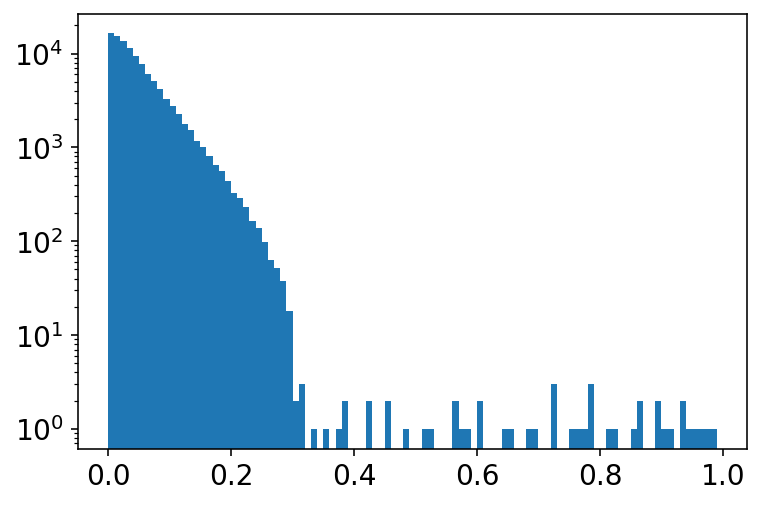

In [43]:
plt.hist(reco_quality,bins=np.arange(0,1,0.01),log=True)
plt.show()

In [86]:
with tables.open_file(data_dir+'nugen_21217.h5','r') as f:
# with tables.open_file(data_dir+'nugen_21002.h5','r') as f:
    n_file = 21632
    
    CUT_dedx = f.root.Collection.cols.len_dEdxVector[:] >= 6
    CUT_cascllh = f.root.CascadeLlhVertexFitParams.cols.rlogL[:] < 18
    CUT_d_IC = f.root.Dist_to_IC_center.cols.value[:] < 450
    CUT_LdirC = f.root.SplineMPEDirectHitsC.cols.dir_track_length[:] > 600
    CUT_balloon = f.root.Balloon.cols.InIceBalloonParameter[:] < 0.22
    CUT_multiplicity = f.root.TologicalCounterSplitCount.cols.value[:] == 1
    CUT_coincident = f.root.MCPrimary_coincident.cols.value[:] == 0 # buggy weight distribution for coincidents!! 
    CUT_reco_quality = np.abs((np.log10(f.root.SplineMPETruncatedEnergy_SPICEMie_BINS_Muon.cols.energy[:]) - np.log10(f.root.MCPrimary_new.cols.energy[:]))/np.log10(f.root.MCPrimary_new.cols.energy[:])) < E_reco_cut   
    
    CUT = CUT_dedx & CUT_cascllh & CUT_d_IC & CUT_LdirC & CUT_balloon & CUT_multiplicity & CUT_coincident & CUT_reco_quality
    
    chi2_red_new_numu_nominal = f.root.Collection.cols.chi2_red_new[:][CUT]
    zenith_numu_nominal = f.root.SplineMPE.cols.zenith[:][CUT]
    truncated_muon_e_numu_nominal = f.root.SplineMPETruncatedEnergy_SPICEMie_BINS_Muon.cols.energy[:][CUT]
    NPE_numu_nominal = f.root.QTot.cols.value[:][CUT]
    Qtot_numu_nominal = f.root.Balloon.cols.InIceTotalCharge[:][CUT]
    N_dom_numu_nominal = f.root.Balloon.cols.N_Doms[:][CUT]
    N_pulses_numu_nominal = f.root.Balloon.cols.N_Pulses[:][CUT]
    balloon_numu_nominal = f.root.Balloon.cols.InIceBalloonParameter[:][CUT]
    topocount_numu_nominal = f.root.TologicalCounterSplitCount.cols.value[:][CUT]
    d_to_IC_center_numu_nominal = f.root.Dist_to_IC_center.cols.value[:][CUT]
    d_to_IT_center_numu_nominal = f.root.Dist_to_IT_center.cols.value[:][CUT]
    Ldir_numu_nominal = f.root.SplineMPEDirectHitsC.cols.dir_track_length[:][CUT]
    coincidence_numu_nominal = f.root.MCPrimary_coincident.cols.value[:][CUT]
    prim_e_numu_nominal = f.root.MCPrimary_new.cols.energy[:][CUT]
    zenith_truth_numu_nominal = f.root.MCPrimary_new.cols.zenith[:][CUT]

    weight_conv_numu_nominal = f.root.weight_honda2006_h3a[:][CUT] * lifetime/n_file * 2 
    weight_prompt_numu_nominal = f.root.weight_BERSS_H3p_central[:][CUT] * lifetime/n_file * 2 

    ### astrophysical ###
    energy = f.root.MCPrimary_new.cols.energy[:][CUT]
    OneWeight = f.root.I3MCWeightDict.cols.OneWeight[:][CUT]
    NEvents = f.root.I3MCWeightDict.cols.NEvents[:][CUT]
    weight_astro_numu_nominal = (6.7 * 10**(-18))/6 * (energy/10**5)**(-2) * OneWeight/(n_file * NEvents) * lifetime * 2  # 10**5: 100 TeV. 2 is nu+nubar
    

with tables.open_file(data_dir+'nugen_21003.h5','r') as f:
    n_file = 9964
    
    CUT_dedx = f.root.Collection.cols.len_dEdxVector[:] >= 6
    CUT_cascllh = f.root.CascadeLlhVertexFitParams.cols.rlogL[:] < 18
    CUT_d_IC = f.root.Dist_to_IC_center.cols.value[:] < 450
    CUT_LdirC = f.root.SplineMPEDirectHitsC.cols.dir_track_length[:] > 600
    CUT_balloon = f.root.Balloon.cols.InIceBalloonParameter[:] < 0.22
    CUT_multiplicity = f.root.TologicalCounterSplitCount.cols.value[:] == 1
    CUT_coincident = f.root.MCPrimary_coincident.cols.value[:] == 0 # buggy weight distribution for coincidents!! 
    CUT_reco_quality = np.abs((np.log10(f.root.SplineMPETruncatedEnergy_SPICEMie_BINS_Muon.cols.energy[:]) - np.log10(f.root.MCPrimary_new.cols.energy[:]))/np.log10(f.root.MCPrimary_new.cols.energy[:])) < E_reco_cut   
    
    CUT = CUT_dedx & CUT_cascllh & CUT_d_IC & CUT_LdirC & CUT_balloon & CUT_multiplicity & CUT_coincident & CUT_reco_quality
    
    chi2_red_new_numu_scat_up = f.root.Collection.cols.chi2_red_new[:][CUT]
    zenith_numu_scat_up = f.root.SplineMPE.cols.zenith[:][CUT]
    truncated_muon_e_numu_scat_up = f.root.SplineMPETruncatedEnergy_SPICEMie_BINS_Muon.cols.energy[:][CUT]
    NPE_numu_scat_up = f.root.QTot.cols.value[:][CUT]
    Qtot_numu_scat_up = f.root.Balloon.cols.InIceTotalCharge[:][CUT]
    N_dom_numu_scat_up = f.root.Balloon.cols.N_Doms[:][CUT]
    N_pulses_numu_scat_up = f.root.Balloon.cols.N_Pulses[:][CUT]
    balloon_numu_scat_up = f.root.Balloon.cols.InIceBalloonParameter[:][CUT]
    topocount_numu_scat_up = f.root.TologicalCounterSplitCount.cols.value[:][CUT]
    d_to_IC_center_numu_scat_up = f.root.Dist_to_IC_center.cols.value[:][CUT]
    d_to_IT_center_numu_scat_up = f.root.Dist_to_IT_center.cols.value[:][CUT]
    Ldir_numu_scat_up = f.root.SplineMPEDirectHitsC.cols.dir_track_length[:][CUT]
    coincidence_numu_scat_up = f.root.MCPrimary_coincident.cols.value[:][CUT]
    prim_e_numu_scat_up = f.root.MCPrimary_new.cols.energy[:][CUT]
    zenith_truth_numu_scat_up = f.root.MCPrimary_new.cols.zenith[:][CUT]

    weight_conv_numu_scat_up = f.root.weight_honda2006_h3a[:][CUT] * lifetime/n_file * 2
    weight_prompt_numu_scat_up = f.root.weight_BERSS_H3p_central[:][CUT] * lifetime/n_file * 2

    ### astrophysical ###
    energy = f.root.MCPrimary_new.cols.energy[:][CUT]
    OneWeight = f.root.I3MCWeightDict.cols.OneWeight[:][CUT]
    NEvents = f.root.I3MCWeightDict.cols.NEvents[:][CUT]
    weight_astro_numu_scat_up = (6.7 * 10**(-18))/6 * (energy/10**5)**(-2) * OneWeight/(n_file * NEvents) * lifetime * 2  # 10**5: 100 TeV. 2 is nu+nubar
    
    
# 11883 numu (E^-1 @ generator level)
with tables.open_file(data_dir+'nugen_21004.h5','r') as f:
    n_file = 9973
    
    CUT_dedx = f.root.Collection.cols.len_dEdxVector[:] >= 6
    CUT_cascllh = f.root.CascadeLlhVertexFitParams.cols.rlogL[:] < 18
    CUT_d_IC = f.root.Dist_to_IC_center.cols.value[:] < 450
    CUT_LdirC = f.root.SplineMPEDirectHitsC.cols.dir_track_length[:] > 600
    CUT_balloon = f.root.Balloon.cols.InIceBalloonParameter[:] < 0.22
    CUT_multiplicity = f.root.TologicalCounterSplitCount.cols.value[:] == 1
    CUT_coincident = f.root.MCPrimary_coincident.cols.value[:] == 0 # buggy weight distribution for coincidents!! 
    CUT_reco_quality = np.abs((np.log10(f.root.SplineMPETruncatedEnergy_SPICEMie_BINS_Muon.cols.energy[:]) - np.log10(f.root.MCPrimary_new.cols.energy[:]))/np.log10(f.root.MCPrimary_new.cols.energy[:])) < E_reco_cut   
    
    CUT = CUT_dedx & CUT_cascllh & CUT_d_IC & CUT_LdirC & CUT_balloon & CUT_multiplicity & CUT_coincident & CUT_reco_quality
    
    chi2_red_new_numu_scat_down = f.root.Collection.cols.chi2_red_new[:][CUT]
    zenith_numu_scat_down = f.root.SplineMPE.cols.zenith[:][CUT]
    truncated_muon_e_numu_scat_down = f.root.SplineMPETruncatedEnergy_SPICEMie_BINS_Muon.cols.energy[:][CUT]
    NPE_numu_scat_down = f.root.QTot.cols.value[:][CUT]
    Qtot_numu_scat_down = f.root.Balloon.cols.InIceTotalCharge[:][CUT]
    N_dom_numu_scat_down = f.root.Balloon.cols.N_Doms[:][CUT]
    N_pulses_numu_scat_down = f.root.Balloon.cols.N_Pulses[:][CUT]
    balloon_numu_scat_down = f.root.Balloon.cols.InIceBalloonParameter[:][CUT]
    topocount_numu_scat_down = f.root.TologicalCounterSplitCount.cols.value[:][CUT]
    d_to_IC_center_numu_scat_down = f.root.Dist_to_IC_center.cols.value[:][CUT]
    d_to_IT_center_numu_scat_down = f.root.Dist_to_IT_center.cols.value[:][CUT]
    Ldir_numu_scat_down = f.root.SplineMPEDirectHitsC.cols.dir_track_length[:][CUT]
    coincidence_numu_scat_down = f.root.MCPrimary_coincident.cols.value[:][CUT]
    prim_e_numu_scat_down = f.root.MCPrimary_new.cols.energy[:][CUT]
    zenith_truth_numu_scat_down = f.root.MCPrimary_new.cols.zenith[:][CUT]

    weight_conv_numu_scat_down = f.root.weight_honda2006_h3a[:][CUT] * lifetime/n_file * 2 
    weight_prompt_numu_scat_down = f.root.weight_BERSS_H3p_central[:][CUT] * lifetime/n_file * 2 

    ### astrophysical ###
    energy = f.root.MCPrimary_new.cols.energy[:][CUT]
    OneWeight = f.root.I3MCWeightDict.cols.OneWeight[:][CUT]
    NEvents = f.root.I3MCWeightDict.cols.NEvents[:][CUT]
    weight_astro_numu_scat_down = (6.7 * 10**(-18))/6 * (energy/10**5)**(-2) * OneWeight/(n_file * NEvents) * lifetime * 2  # 10**5: 100 TeV. 2 is nu+nubar
    
# 11883 numu (E^-1 @ generator level)
with tables.open_file(data_dir+'nugen_21005.h5','r') as f:
    n_file = 9972
    
    CUT_dedx = f.root.Collection.cols.len_dEdxVector[:] >= 6
    CUT_cascllh = f.root.CascadeLlhVertexFitParams.cols.rlogL[:] < 18
    CUT_d_IC = f.root.Dist_to_IC_center.cols.value[:] < 450
    CUT_LdirC = f.root.SplineMPEDirectHitsC.cols.dir_track_length[:] > 600
    CUT_balloon = f.root.Balloon.cols.InIceBalloonParameter[:] < 0.22
    CUT_multiplicity = f.root.TologicalCounterSplitCount.cols.value[:] == 1
    CUT_coincident = f.root.MCPrimary_coincident.cols.value[:] == 0 # buggy weight distribution for coincidents!! 
    CUT_reco_quality = np.abs((np.log10(f.root.SplineMPETruncatedEnergy_SPICEMie_BINS_Muon.cols.energy[:]) - np.log10(f.root.MCPrimary_new.cols.energy[:]))/np.log10(f.root.MCPrimary_new.cols.energy[:])) < E_reco_cut   
    
    CUT = CUT_dedx & CUT_cascllh & CUT_d_IC & CUT_LdirC & CUT_balloon & CUT_multiplicity & CUT_coincident & CUT_reco_quality
    
    chi2_red_new_numu_abs_up = f.root.Collection.cols.chi2_red_new[:][CUT]
    zenith_numu_abs_up = f.root.SplineMPE.cols.zenith[:][CUT]
    truncated_muon_e_numu_abs_up = f.root.SplineMPETruncatedEnergy_SPICEMie_BINS_Muon.cols.energy[:][CUT]
    NPE_numu_abs_up = f.root.QTot.cols.value[:][CUT]
    Qtot_numu_abs_up = f.root.Balloon.cols.InIceTotalCharge[:][CUT]
    N_dom_numu_abs_up = f.root.Balloon.cols.N_Doms[:][CUT]
    N_pulses_numu_abs_up = f.root.Balloon.cols.N_Pulses[:][CUT]
    balloon_numu_abs_up = f.root.Balloon.cols.InIceBalloonParameter[:][CUT]
    topocount_numu_abs_up = f.root.TologicalCounterSplitCount.cols.value[:][CUT]
    d_to_IC_center_numu_abs_up = f.root.Dist_to_IC_center.cols.value[:][CUT]
    d_to_IT_center_numu_abs_up = f.root.Dist_to_IT_center.cols.value[:][CUT]
    Ldir_numu_abs_up = f.root.SplineMPEDirectHitsC.cols.dir_track_length[:][CUT]
    coincidence_numu_abs_up = f.root.MCPrimary_coincident.cols.value[:][CUT]
    prim_e_numu_abs_up = f.root.MCPrimary_new.cols.energy[:][CUT]
    zenith_truth_numu_abs_up = f.root.MCPrimary_new.cols.zenith[:][CUT]

    weight_conv_numu_abs_up = f.root.weight_honda2006_h3a[:][CUT] * lifetime/n_file 
    weight_prompt_numu_abs_up = f.root.weight_BERSS_H3p_central[:][CUT] * lifetime/n_file 

    ### astrophysical ###
    energy = f.root.MCPrimary_new.cols.energy[:][CUT]
    OneWeight = f.root.I3MCWeightDict.cols.OneWeight[:][CUT]
    NEvents = f.root.I3MCWeightDict.cols.NEvents[:][CUT]
    weight_astro_numu_abs_up = (6.7 * 10**(-18))/6 * (energy/10**5)**(-2) * OneWeight/(n_file * NEvents) * lifetime * 2  # 10**5: 100 TeV. 2 is nu+nubar
    
# 11883 numu (E^-1 @ generator level)
with tables.open_file(data_dir+'nugen_21006.h5','r') as f:
    n_file = 9962
    
    CUT_dedx = f.root.Collection.cols.len_dEdxVector[:] >= 6
    CUT_cascllh = f.root.CascadeLlhVertexFitParams.cols.rlogL[:] < 18
    CUT_d_IC = f.root.Dist_to_IC_center.cols.value[:] < 450
    CUT_LdirC = f.root.SplineMPEDirectHitsC.cols.dir_track_length[:] > 600
    CUT_balloon = f.root.Balloon.cols.InIceBalloonParameter[:] < 0.22
    CUT_multiplicity = f.root.TologicalCounterSplitCount.cols.value[:] == 1
    CUT_coincident = f.root.MCPrimary_coincident.cols.value[:] == 0 # buggy weight distribution for coincidents!! 
    CUT_reco_quality = np.abs((np.log10(f.root.SplineMPETruncatedEnergy_SPICEMie_BINS_Muon.cols.energy[:]) - np.log10(f.root.MCPrimary_new.cols.energy[:]))/np.log10(f.root.MCPrimary_new.cols.energy[:])) < E_reco_cut   
    
    CUT = CUT_dedx & CUT_cascllh & CUT_d_IC & CUT_LdirC & CUT_balloon & CUT_multiplicity & CUT_coincident & CUT_reco_quality
    
    chi2_red_new_numu_abs_down = f.root.Collection.cols.chi2_red_new[:][CUT]
    zenith_numu_abs_down = f.root.SplineMPE.cols.zenith[:][CUT]
    truncated_muon_e_numu_abs_down = f.root.SplineMPETruncatedEnergy_SPICEMie_BINS_Muon.cols.energy[:][CUT]
    NPE_numu_abs_down = f.root.QTot.cols.value[:][CUT]
    Qtot_numu_abs_down = f.root.Balloon.cols.InIceTotalCharge[:][CUT]
    N_dom_numu_abs_down = f.root.Balloon.cols.N_Doms[:][CUT]
    N_pulses_numu_abs_down = f.root.Balloon.cols.N_Pulses[:][CUT]
    balloon_numu_abs_down = f.root.Balloon.cols.InIceBalloonParameter[:][CUT]
    topocount_numu_abs_down = f.root.TologicalCounterSplitCount.cols.value[:][CUT]
    d_to_IC_center_numu_abs_down = f.root.Dist_to_IC_center.cols.value[:][CUT]
    d_to_IT_center_numu_abs_down = f.root.Dist_to_IT_center.cols.value[:][CUT]
    Ldir_numu_abs_down = f.root.SplineMPEDirectHitsC.cols.dir_track_length[:][CUT]
    coincidence_numu_abs_down = f.root.MCPrimary_coincident.cols.value[:][CUT]
    prim_e_numu_abs_down = f.root.MCPrimary_new.cols.energy[:][CUT]
    zenith_truth_numu_abs_down = f.root.MCPrimary_new.cols.zenith[:][CUT]

    weight_conv_numu_abs_down = f.root.weight_honda2006_h3a[:][CUT] * lifetime/n_file 
    weight_prompt_numu_abs_down = f.root.weight_BERSS_H3p_central[:][CUT] * lifetime/n_file 

    ### astrophysical ###
    energy = f.root.MCPrimary_new.cols.energy[:][CUT]
    OneWeight = f.root.I3MCWeightDict.cols.OneWeight[:][CUT]
    NEvents = f.root.I3MCWeightDict.cols.NEvents[:][CUT]
    weight_astro_numu_abs_down = (6.7 * 10**(-18))/6 * (energy/10**5)**(-2) * OneWeight/(n_file * NEvents) * lifetime * 2  # 10**5: 100 TeV. 2 is nu+nubar

/Users/yang/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in greater
  


In [87]:
def comparison(var,weight,bins,varname,title):
    var_nominal = var[0]
    var_abs_up = var[1]
    var_abs_down = var[2]
    var_scat_up = var[3]
    var_scat_down = var[4]

    weight_nominal = weight[0]
    weight_abs_up = weight[1]
    weight_abs_down = weight[2]
    weight_scat_up = weight[3]
    weight_scat_down = weight[4]

    plt.figure(figsize=(7,7))

    gs = gridspec.GridSpec(2, 1, height_ratios=[4, 1], wspace=0.0, hspace=0.1)
    ax1 = plt.subplot(gs[0])
    
    c_abs_up = 'darkorange'
    c_abs_down = 'r'
    c_scat_up = 'dodgerblue'
    c_scat_down = 'm'

    h_abs_up,b_abs_up,_ = plt.hist(var_abs_up,bins=bins,log=True,weights=weight_abs_up,histtype='step',label=r'$abs up$',bottom=10**(-8),color=c_abs_up)
    h_abs_down,b_abs_down,_ = plt.hist(var_abs_down,bins=bins,log=True,weights=weight_abs_down,histtype='step',label=r'$abs down$',bottom=10**(-8),color=c_abs_down)
    h_scat_up,b_scat_up,_ = plt.hist(var_scat_up,bins=bins,log=True,weights=weight_scat_up,histtype='step',label=r'$scat up$',bottom=10**(-8),color=c_scat_up)
    h_scat_down,b_scat_down,_ = plt.hist(var_scat_down,bins=bins,log=True,weights=weight_scat_down,histtype='step',label=r'$scat down$',bottom=10**(-8),color=c_scat_down)
    h_nominal,b_nominal,_ = plt.hist(var_nominal,bins=bins,log=True,weights=weight_nominal,histtype='step',linestyle='dashed',label=r'nominal',bottom=10**(-8),color='black')

    plt.ylabel('Events in 365 days')
    plt.xlim(np.min(bins),np.max(bins))
    plt.ylim(np.min(h_nominal)/2,)
    plt.legend(prop={'size': 11},loc='best')
    plt.title(title)
    plt.grid(True,which='both',zorder=0,alpha=0.3)
    ax1.tick_params(labelbottom=False)    
    
    ax2 = plt.subplot(gs[1])
    
    # remove empty bins
    b = (b_nominal[1:] + b_nominal[:-1])/2
    cut_nozero = (h_nominal>0)
    
    plt.plot(b[cut_nozero], h_abs_up[cut_nozero]/h_nominal[cut_nozero], '.-',color=c_abs_up)
    plt.plot(b[cut_nozero], h_abs_down[cut_nozero]/h_nominal[cut_nozero], '.-',color=c_abs_down)
    plt.plot(b[cut_nozero], h_scat_up[cut_nozero]/h_nominal[cut_nozero], '.-',color=c_scat_up)
    plt.plot(b[cut_nozero], h_scat_down[cut_nozero]/h_nominal[cut_nozero], '.-',color=c_scat_down)

    plt.axhline(1,ls='--',lw=1,color='black')
    plt.axhline(0.5,ls=':',lw=1,color='black')
    plt.axhline(1.5,ls=':',lw=1,color='black')

    plt.xlabel(varname)
    plt.ylabel('ratio to nominal')
    plt.xlim(np.min(bins),np.max(bins))
    plt.ylim(0.5,1.5)
    plt.grid(True,which='both',zorder=0,alpha=0.3)
    ax2.yaxis.set_major_locator(ticker.MultipleLocator(0.5))
    ax2.yaxis.set_minor_locator(ticker.MultipleLocator(0.1))
    
#     plt.savefig(fig_dir+varname+'_dataMC.png',dpi=300)

/Users/yang/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.


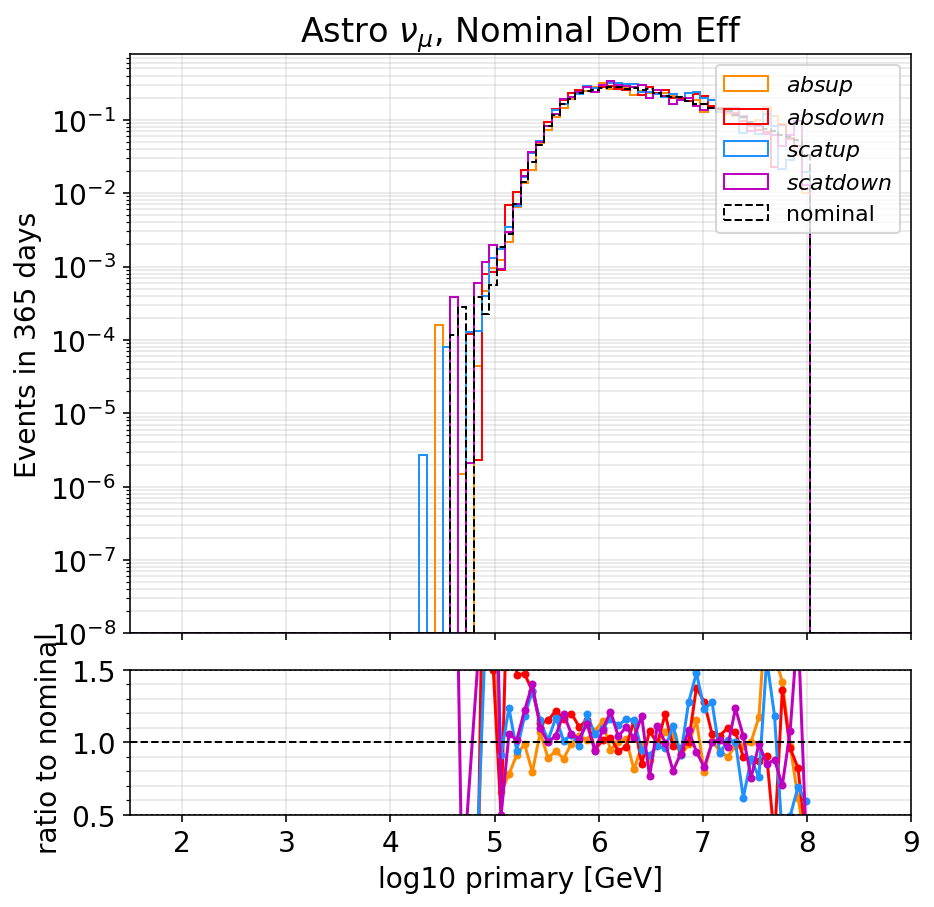

In [88]:
comparison([
            np.log10(prim_e_numu_nominal),
            np.log10(prim_e_numu_abs_up),
            np.log10(prim_e_numu_abs_down),
            np.log10(prim_e_numu_scat_up),
            np.log10(prim_e_numu_scat_down),
           ],
           [
            weight_astro_numu_nominal,
            weight_astro_numu_abs_up,
            weight_astro_numu_abs_down,
            weight_astro_numu_scat_up,
            weight_astro_numu_scat_down,
           ],
           np.linspace(1.5,9.,101),
           'log10 primary [GeV]',
           r'Astro $\nu_\mu$, Nominal Dom Eff'
          )

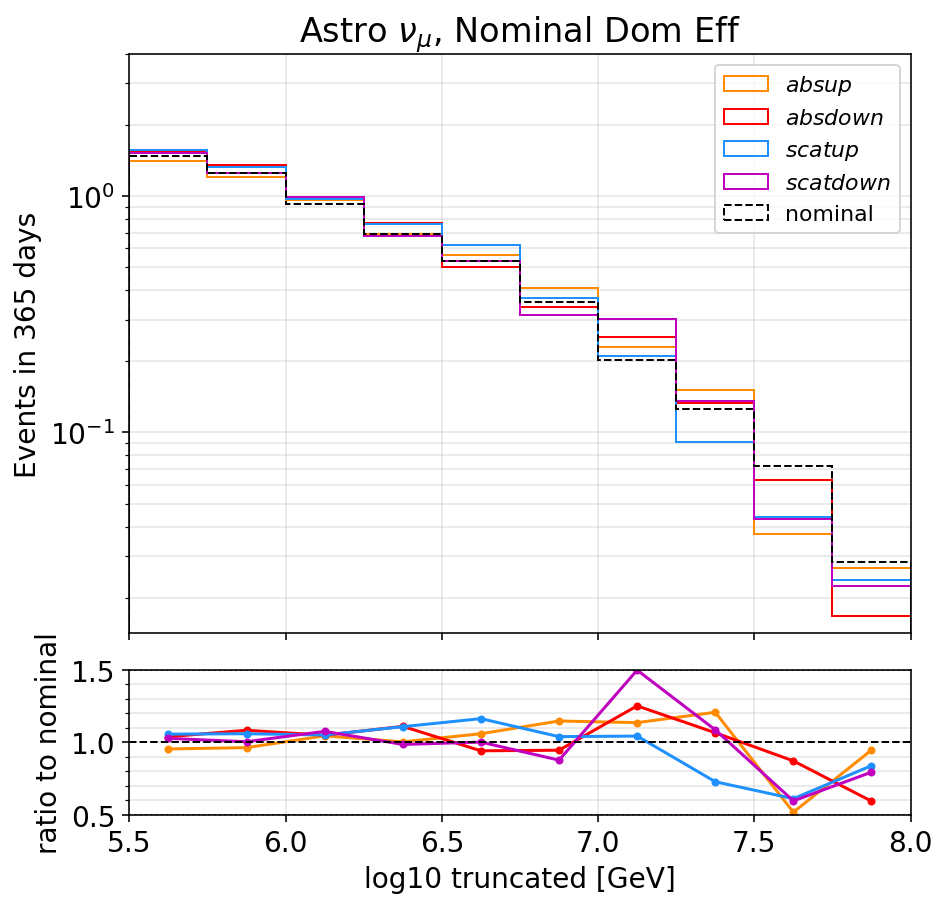

In [89]:
comparison([
            np.log10(truncated_muon_e_numu_nominal),
            np.log10(truncated_muon_e_numu_abs_up),
            np.log10(truncated_muon_e_numu_abs_down),
            np.log10(truncated_muon_e_numu_scat_up),
            np.log10(truncated_muon_e_numu_scat_down),
           ],
           [
            weight_astro_numu_nominal,
            weight_astro_numu_abs_up,
            weight_astro_numu_abs_down,
            weight_astro_numu_scat_up,
            weight_astro_numu_scat_down,
           ],
           np.linspace(5.5,8.,11),
           'log10 truncated [GeV]',
           r'Astro $\nu_\mu$, Nominal Dom Eff'
          )

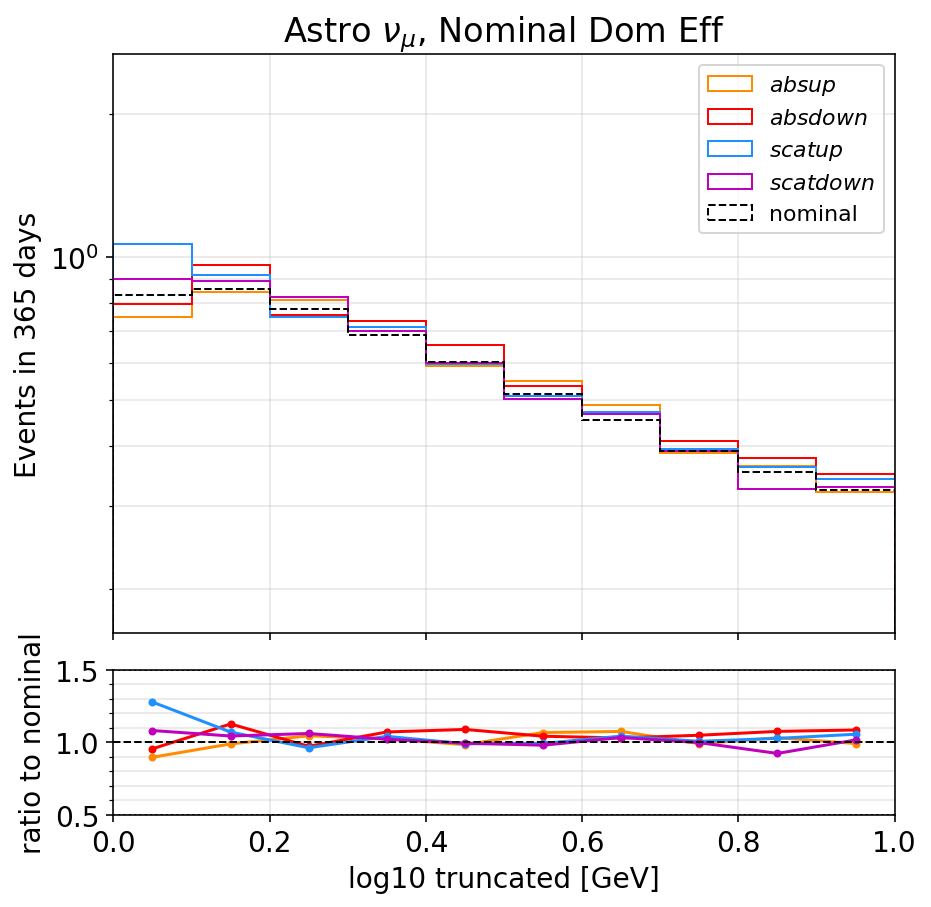

In [90]:
comparison([
            np.cos(zenith_numu_nominal),
            np.cos(zenith_numu_abs_up),
            np.cos(zenith_numu_abs_down),
            np.cos(zenith_numu_scat_up),
            np.cos(zenith_numu_scat_down),
           ],
           [
            weight_astro_numu_nominal,
            weight_astro_numu_abs_up,
            weight_astro_numu_abs_down,
            weight_astro_numu_scat_up,
            weight_astro_numu_scat_down,
           ],
           np.linspace(0,1,11),
           'log10 truncated [GeV]',
           r'Astro $\nu_\mu$, Nominal Dom Eff'
          )

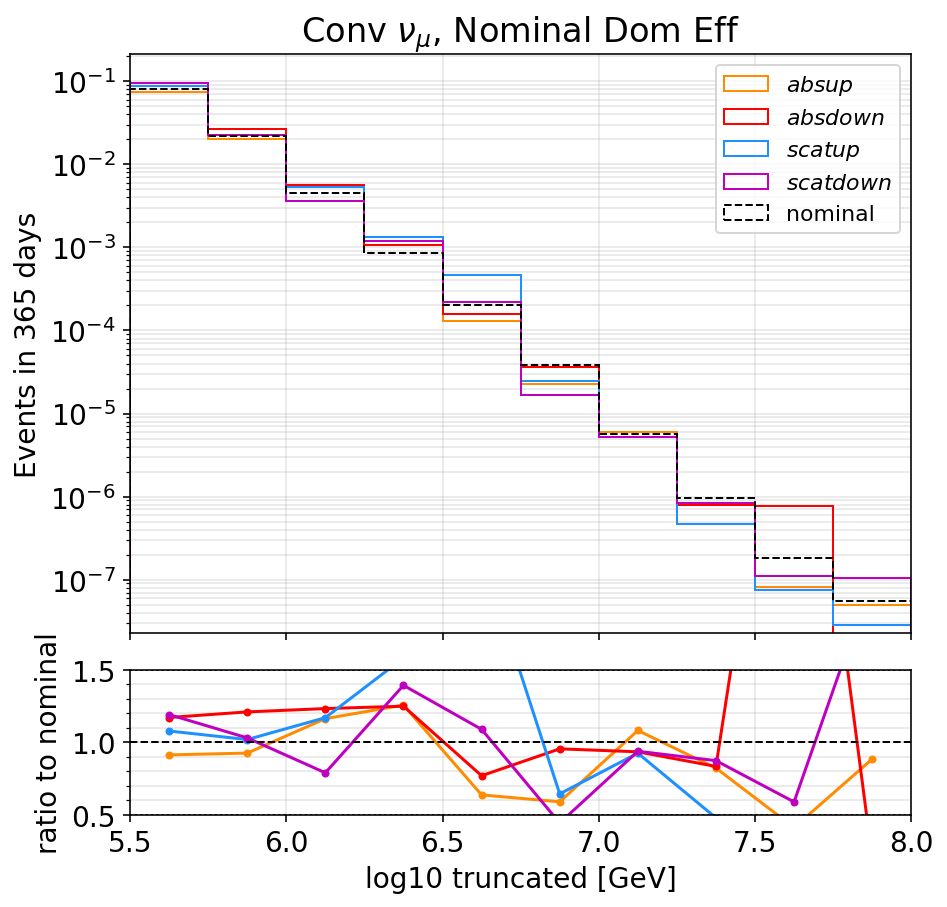

In [91]:
comparison([
            np.log10(truncated_muon_e_numu_nominal),
            np.log10(truncated_muon_e_numu_abs_up),
            np.log10(truncated_muon_e_numu_abs_down),
            np.log10(truncated_muon_e_numu_scat_up),
            np.log10(truncated_muon_e_numu_scat_down),
           ],
           [
            weight_conv_numu_nominal,
            weight_conv_numu_abs_up,
            weight_conv_numu_abs_down,
            weight_conv_numu_scat_up,
            weight_conv_numu_scat_down,
           ],
           np.linspace(5.5,8.,11),
           'log10 truncated [GeV]',
           r'Conv $\nu_\mu$, Nominal Dom Eff'
          )

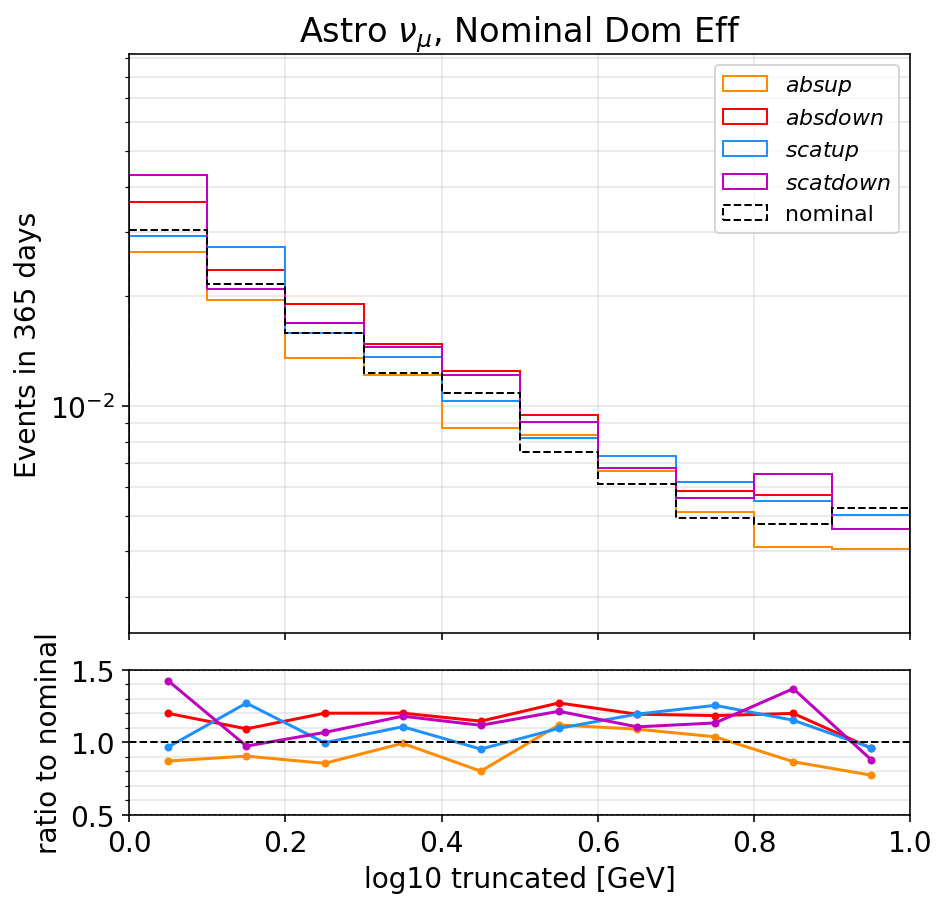

In [92]:
comparison([
            np.cos(zenith_numu_nominal),
            np.cos(zenith_numu_abs_up),
            np.cos(zenith_numu_abs_down),
            np.cos(zenith_numu_scat_up),
            np.cos(zenith_numu_scat_down),
           ],
           [
            weight_conv_numu_nominal,
            weight_conv_numu_abs_up,
            weight_conv_numu_abs_down,
            weight_conv_numu_scat_up,
            weight_conv_numu_scat_down,
           ],
           np.linspace(0,1,11),
           'log10 truncated [GeV]',
           r'Astro $\nu_\mu$, Nominal Dom Eff'
          )

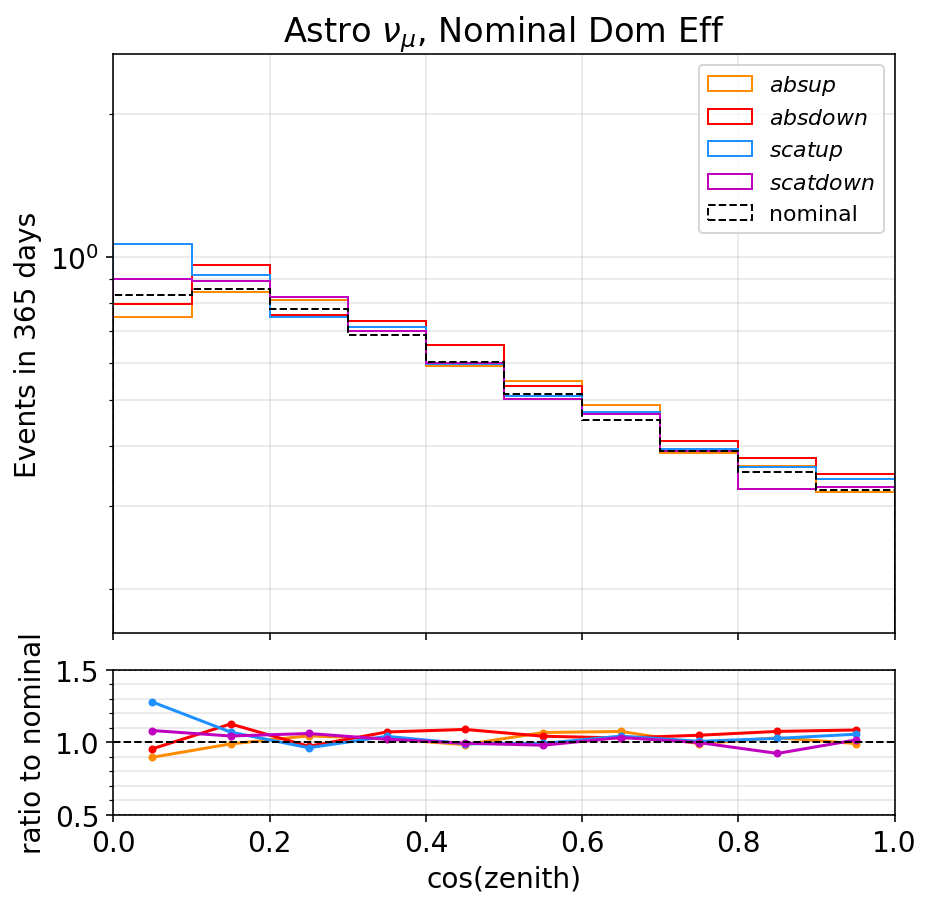

In [93]:
comparison([
            np.cos(zenith_numu_nominal),
            np.cos(zenith_numu_abs_up),
            np.cos(zenith_numu_abs_down),
            np.cos(zenith_numu_scat_up),
            np.cos(zenith_numu_scat_down),
           ],
           [
            weight_astro_numu_nominal,
            weight_astro_numu_abs_up,
            weight_astro_numu_abs_down,
            weight_astro_numu_scat_up,
            weight_astro_numu_scat_down,
           ],
           np.linspace(0,1,11),
           'cos(zenith)',
           r'Astro $\nu_\mu$, Nominal Dom Eff'
          )

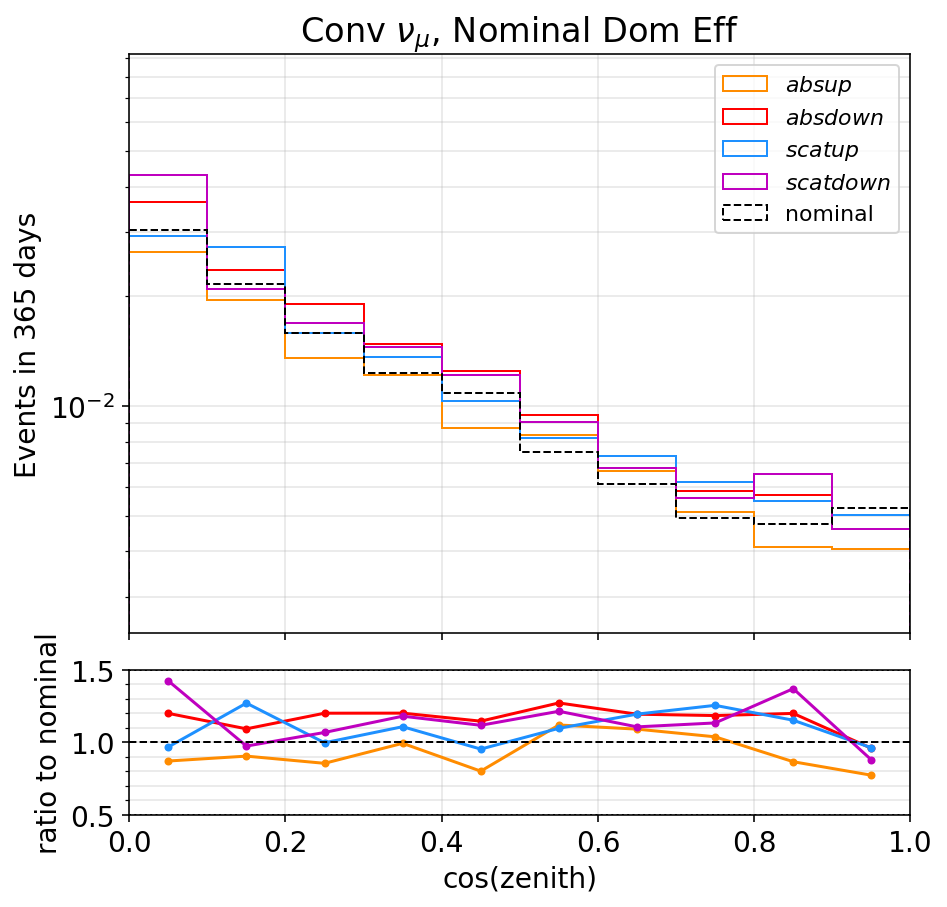

In [94]:
comparison([
            np.cos(zenith_numu_nominal),
            np.cos(zenith_numu_abs_up),
            np.cos(zenith_numu_abs_down),
            np.cos(zenith_numu_scat_up),
            np.cos(zenith_numu_scat_down),
           ],
           [
            weight_conv_numu_nominal,
            weight_conv_numu_abs_up,
            weight_conv_numu_abs_down,
            weight_conv_numu_scat_up,
            weight_conv_numu_scat_down,
           ],
           np.linspace(0,1,11),
           'cos(zenith)',
           r'Conv $\nu_\mu$, Nominal Dom Eff'
          )

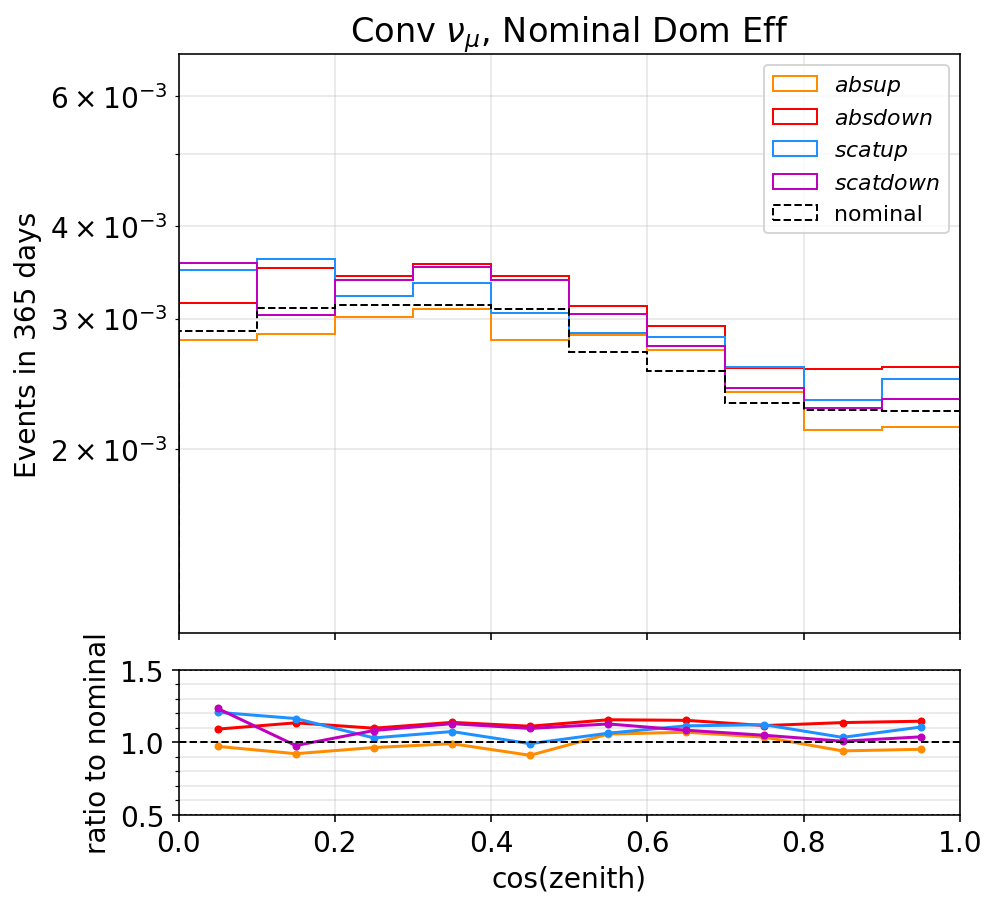

In [95]:
comparison([
            np.cos(zenith_numu_nominal),
            np.cos(zenith_numu_abs_up),
            np.cos(zenith_numu_abs_down),
            np.cos(zenith_numu_scat_up),
            np.cos(zenith_numu_scat_down),
           ],
           [
            weight_prompt_numu_nominal,
            weight_prompt_numu_abs_up,
            weight_prompt_numu_abs_down,
            weight_prompt_numu_scat_up,
            weight_prompt_numu_scat_down,
           ],
           np.linspace(0,1,11),
           'cos(zenith)',
           r'Conv $\nu_\mu$, Nominal Dom Eff'
          )